# EDA Project: Seattle Airbnb Data

## 0. Set-up

In [203]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, log_loss

In [2]:
# Configure settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.options.display.max_colwidth = 200

%matplotlib inline

## 1. Introduction and problem statements

This notebook covers an exploration of a Kaggle dataset, 'Seattle Airbnb Open Data' [0].

We'll use this notebook to explore the data and attempt to answer a number of questions from it. 

I'm particularly interested in the nature and impact of guest reviews. Focusing on this topic, we'll explore three questions related to this data set:

<b>1. How can we group and categorize review text in the data set based on sentiment?</b>

Specifically, I'm interested here in what proportion of reviews might be classed as positive, neutral, or negative based on sentiment analysis.

<b>2. Which neighbourhoods tend to generate disproportionately positive sentiment in reviews?</b>

Building on the above question, we'll explore here which neighbourhoods (if any) appear to generate disproportionately positive sentiment from guests. We'll review here the distribution of positive sentiment by locality, and observe how closely it mirrors the distribution of reviews by locality overall.  

<b>3. Which features are most predictive of positive review scores?</b>

Here we'll aim to fit a model to predict positive review scores, using features in the listings data set. We'll explore which of these features make the biggest impact in predicting average review scores. 


---


Before attempting to answer these questions, however, we'll perform an initial review and preparation of the data set in question.

[0] https://www.kaggle.com/airbnb/seattle/downloads/seattle.zip/2#reviews.csv

## 2. Data Exploration

We'll now move on to explore the data set, and to reach an understanding of the structure and characteristics of the data we're working with. We'll proceed through each of the data files sequentially.

### 2.1. Listings file

Let's begin by reading and understanding some basic characteristics of the listings data file. Based on the Kaggle description, we know already roughly what this dataframe will contain - details on a number of Airbnb properties listed in Seattle.

In [3]:
# Import the data file
listings_raw_df = pd.read_csv('data/listings.csv', sep = ',') 

In [4]:
# Print the dimensions of the data file
listings_raw_df.shape

(3818, 92)

In [5]:
# Print details of the columns in the data file
listings_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [6]:
# Print a sample of rows from the data file
listings_raw_df.sample(n = 300)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2615,9494623,https://www.airbnb.com/rooms/9494623,20160104002432,2016-01-04,205 Modern Studio on Capitol Hill,This is a modern fully-furnished studio apartment in a brand new building on Capitol Hill. At Roy Street Commons you can enjoy your complete privacy and mingle with our other guests in our common ...,This is a fully-furnished studio designed for one person. The unit is compact and the bathroom is separated from the rest of the studio by a curtain. Your completely private studio space includes ...,This is a modern fully-furnished studio apartment in a brand new building on Capitol Hill. At Roy Street Commons you can enjoy your complete privacy and mingle with our other guests in our common ...,none,"Close to downtown, Capitol Hill is one of Seattle's prettiest and most-admired neighborhoods.","Should you not be able to book this particular studio, please check our other offerings by clicking on host and then all listings.",It's a short walk to Broadway and just a bit longer to downtown. There is a Pronto bike share 100 yards away. There is a bus stop for downtown 300 yards away.,https://a2.muscache.com/ac/pictures/c0c4709d-f902-4c7d-8f51-384b00ab3d38.jpg?interpolation=lanczos-none&size=small&output-format=jpg&output-quality=70,https://a2.muscache.com/im/pictures/c0c4709d-f902-4c7d-8f51-384b00ab3d38.jpg?aki_policy=medium,https://a2.muscache.com/ac/pictures/c0c4709d-f902-4c7d-8f51-384b00ab3d38.jpg?interpolation=lanczos-none&size=large_cover&output-format=jpg&output-quality=70,https://a2.muscache.com/ac/pictures/c0c4709d-f902-4c7d-8f51-384b00ab3d38.jpg?interpolation=lanczos-none&size=x_large_cover&output-format=jpg&output-quality=70,42537846,https://www.airbnb.com/users/show/42537846,Eric,2015-08-25,"Seattle, Washington, United States",NaN,within an hour,99%,100%,f,"https://a2.muscache.com/ac/pictures/a21126b7-ee57-4f46-982f-598e4546901f.jpg?interpolation=lanczos-none&crop=w:w;*,*&crop=h:h;*,*&resize=50:*&output-format=jpg&output-quality=70","https://a2.muscache.com/ac/pictures/a21126b7-ee57-4f46-982f-598e4546901f.jpg?interpolation=lanczos-none&crop=w:w;*,*&crop=h:h;*,*&resize=225:*&output-format=jpg&output-quality=70",Capitol Hill,17.0,17.0,"['email', 'phone', 'reviews', 'manual_offline']",t,t,"12th Avenue East, Seattle, WA 98102, United States",Capitol Hill,Broadway,Capitol Hill,Seattle,WA,98102,Seattle,"Seattle, WA",US,United States,47.625245,-122.316494,t,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Kitchen,""Buzzer/Wireless Intercom"",Heating,Washer,Dryer,Essentials,""24-Hour Check-in"",Hangers,""Hair Dry

We can see immediately that the listings data is quite rich in features, albeit not hugely numerous in observations (i.e. rows).

We have 92 columns in the file. While some reflect metadata on the properties themselves (user IDs, URLs, scrape dates, and so on), the majority of these columns are features that could be useful for analysis. These features include property location, number of bedrooms, amenities, and many more. 

Two attributes seem particularly useful as potential target variables for analysis - price and average review scores. We're going to focus on the latter for our analysis.

There seem to be some new variables we could extract here, too. The 'amenities' field in particular contains within it several potential new binary variables (indicating e.g. the presence or absence of a TV, or Internet). 

We can see from this initial print-outs however that there are some data quality issues overall - notably a number of null fields. Let's now explore potential issues in the dataframe, and determine potential data preparation we'll need to do.

In [7]:
# Count and display columns with highest volume of null values
percent_missing = listings_raw_df.isnull().sum() * 100 / len(listings_raw_df)
listings_raw_missing = pd.DataFrame({'column_name': listings_raw_df.columns,
                                 'percent_missing': percent_missing})
listings_raw_missing.sort_values('percent_missing', inplace=True, ascending=False)
listings_raw_missing

,column_name,percent_missing
license,license,100.000000
square_feet,square_feet,97.459403
monthly_price,monthly_price,60.267156
security_deposit,security_deposit,51.126244
weekly_price,weekly_price,47.380828
notes,notes,42.063908
neighborhood_overview,neighborhood_overview,27.029859
cleaning_fee,cleaning_fee,26.977475
transit,transit,24.463070
host_about,host_about,22.498690


In [8]:
# Print detail of license variable
listings_raw_df['license'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: license, dtype: float64

In [9]:
# Explore volume of license requirements in the data set
listings_raw_df['requires_license'].value_counts()

f    3818
Name: requires_license, dtype: int64

In [10]:
# Print detail of square footage variable
listings_raw_df['square_feet'].describe()

count      97.000000
mean      854.618557
std       671.404893
min         0.000000
25%       420.000000
50%       750.000000
75%      1200.000000
max      3000.000000
Name: square_feet, dtype: float64

We can see a number of issues here, which we can validate by the printed sample of rows above. They fall into a number of categories. 

To begin with, there are a number of variables that have a material-but-manageable number of null values (< 25%). We'll need to plan carefully how to treat these, but it seems very likely we'll be able to keep these in our data set. 

Four variables have more entries missing (40 - 60%). We may well be able to retain some of these features, but we should handle them with much more care.

Lastly, two variables are at or close to 100% nulls (square_feet and license). In the case of licenses, it seems to be a redundant variable in practice - none of the observations have a license, but none require a license (all rows are marked as 'f' for false on the requires_license variable). 

Square footage just seems to be seldom included for our listings. We *might* be able to make use of this variable, but we'll at best be able to transform it into a boolean to indicate presence/absence (i.e., to capture whether or not a property has included a square footage measure or not). 

### 2.2. Calendar file

We'll now move on to explore the calendar file, and perform a similar initial exploration.

In [11]:
# Import the data file
calendar_raw_df = pd.read_csv('data/calendar.csv', sep = ',')

In [12]:
# Print the dimensions of the data file
calendar_raw_df.shape

(1393570, 4)

In [13]:
# Print details of the columns in the data file
calendar_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [14]:
# Print a sample of rows from the data file
calendar_raw_df.sample(n = 300)

,listing_id,date,available,price
1174655,9975073,2016-03-29,f,NaN
277505,9558353,2016-04-18,f,NaN
1249268,7698721,2016-08-29,t,$117.00
138889,3889050,2016-07-11,t,$40.00
1129783,2260626,2016-04-21,t,$55.00
585463,6239907,2016-01-07,f,NaN
844017,2520890,2016-05-20,t,$85.00
1182,7421966,2016-03-31,f,NaN
1329466,7860837,2016-05-19,f,NaN
1309123,2367298,2016-08-24,t,$184.00


In [15]:
# Count and display columns with highest volume of null values
percent_missing = calendar_raw_df.isnull().sum() * 100 / len(calendar_raw_df)
calendar_raw_df_missing = pd.DataFrame({'column_name': calendar_raw_df.columns,
                                 'percent_missing': percent_missing})
calendar_raw_df_missing.sort_values('percent_missing', inplace=True, ascending=False)
calendar_raw_df_missing

,column_name,percent_missing
price,price,32.938998
listing_id,listing_id,0.000000
date,date,0.000000
available,available,0.000000


In [16]:
# Print a null count grouped by whether a property is available or not
calendar_raw_df['price'].isnull().groupby(calendar_raw_df['available']).sum().to_dict()

{'f': 459028.0, 't': 0.0}

This data file is more straightforward than listings. It's a far larger data file with far more observations (though far fewer columns). It links through to listings based on a foreign_key on listing_id. 

The only null values present are on price. While the null count might seem concerning (~33% of entries), it looks like nulls are only present where a property is listed as unavailable. In other words, for all entries where a property is actually live and listed, we can see it's price point. For any analysis on price, we'd be able to reasonably remove these entries. 

### 2.3. Reviews file

Lastly, let's perform some exploration on the reviews data file. 

In [17]:
# Import the data file
reviews_raw_df = pd.read_csv('data/reviews.csv', sep = ',') 

In [18]:
# Print the dimensions of the data file
reviews_raw_df.shape

(84849, 6)

In [19]:
# Print details of the columns in the data file
reviews_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [20]:
# Print a sample of rows from the data file
reviews_raw_df.sample(n = 300)

,listing_id,id,date,reviewer_id,reviewer_name,comments
78190,3861673,27993822,2015-03-16,25266215,Sarah,"Debbie's cozy retreat was lovely and so clean and fresh. \nAll the amenities of a large hotel. \nWifi, flat screen, wonderful bed extra pillows and blankets , coffee with French press, goodies in..."
38735,5042014,45101649,2015-08-31,4667480,James,The room was great. Had everything I needed (and more). Emiliya was a very accommodating host. I'd definitely look to stay here again if I come back to Ballard!
29364,1802663,16248183,2014-07-24,15338656,Sherry,"Ron's home exceeded my expectations in every way. From the warm welcome, banana bread (everyone loved that), hot tub robes, milk and juice in the fridge, breakfast fixings, comfortable bed, and a..."
43903,762029,46127408,2015-09-08,8072334,Sue,Jean-Marc was an AMAZING host! He welcomed us and chatted a bit which made us feel very at home. The gypsy wagon was perfect. Very clean with extremely comfy beds. The bathroom was clean and had e...
47246,585418,27771240,2015-03-11,27895398,Evette,"Angela was an excellent host! Her description of the space was completely accurate. I was really nervous about my trip because it was my first time traveling alone, but Angela made me feel at home..."
44230,746380,14137482,2014-06-12,16404980,Jat,"The apartment is very nice, clean and comfortable.\r\nGood location, easy to go to downtown. There are many shops, restaurants and supermarket in the area. We will ask to stay here if we have a ch..."
80370,365550,55365285,2015-12-01,32307595,Jessica,"Perfect location - so close to the football stadium! Very clean, cool, simple loft with a great skylight. Dirk and Jaq provided great directions and key pickup was a breeze. Be aware that the bath..."
66055,6087451,33837831,2015-06-01,29594047,Eric & Sarah,This was a great little apartment. It was very clean and the design was beautiful. We felt well taken care of with snacks and toiletries. It was quiet and we both slept quite well. The location...
16528,3383329,42648674,2015-08-15,26682511,Hyunju,She was so nice and welcoming! She wrote us a card and gave us a delicious chocolate and it was so sweet! My friends and I felt like it was home and relaxing.
45632,6107901,56190917,2015-12-10,28129924,Jeanne,"This place was really a great find. Located in a great neighborhood, Fremont. Close to my son who was our ""driver"" around the city. Mackenzie was very accommodating, allowing us to check-in early ..."


In [21]:
# Count and display columns with highest volume of null values
percent_missing = reviews_raw_df.isnull().sum() * 100 / len(reviews_raw_df)
reviews_raw_df_missing = pd.DataFrame({'column_name': reviews_raw_df.columns,
                                 'percent_missing': percent_missing})
reviews_raw_df_missing.sort_values('percent_missing', inplace=True, ascending=False)
reviews_raw_df_missing

,column_name,percent_missing
comments,comments,0.021214
listing_id,listing_id,0.000000
id,id,0.000000
date,date,0.000000
reviewer_id,reviewer_id,0.000000
reviewer_name,reviewer_name,0.000000


This data file contains detail on reviews left by those staying at properties, again with a foreign_key to connect to the listings data file (via listing_id).

The data here does include some null values in the comments field, but it's a small proportion (~2%) - and it's likely due to some reviewers simply opting not to leave a comment.

From our sample print, we do see there are some reviews listed in foreign characters (e.g. chinese characters), which I expect will need to be dealt with before we attempt to use certain text analytics approaches (e.g. sentiment analysis on the text). 

## 3. Data Preparation

We've now explored the data, and identified some potential transformations to the data that we'll need to process. 

Later on we may do some targeted data transformations <em>specific to our questions</em> as we begin to answer them. In this section, however, we'll do some general data preparation that we be helpful throughout our analysis.

As with the above, we'll work through data transformations related to each of the data files in turn.

### 3.1. Listings file

Here a number of tasks are required to prepare the data, including:
- Removing variables we don't aim to use (e.g. metadata values). These won't be helpful for our modelling, and will be available in our raw dataframe to retrieve if required
- Handling columns with high volumes of null fields
- Creating new variables where appropriate

We'll tackle each of these tasks in turn.

In [94]:
# Save a new version of the file to reflect the prepared data set
listings_df = listings_raw_df.copy(deep=True)

In [95]:
# Remove redundant metadata and image link variables
del listings_df['host_name']
del listings_df['listing_url']
del listings_df['scrape_id']
del listings_df['last_scraped']
del listings_df['thumbnail_url']
del listings_df['medium_url']
del listings_df['picture_url']
del listings_df['xl_picture_url']
del listings_df['host_id']
del listings_df['host_url']
del listings_df['host_thumbnail_url']
del listings_df['host_picture_url']

# Remove redundant location variables (neighborhood is covered by neighborhood_cleansed;
# host_neighborhood is mostly duplicative with this too and can be dropped; 
# zip code is unnecessary when we have specific geographic co-ordinates)
del listings_df['neighbourhood']
del listings_df['host_neighbourhood']
del listings_df['zipcode']

In [96]:
# Remove redundant licenses variables (since no properties require a license)
del listings_df['requires_license']
del listings_df['license']

In [97]:
# Create a binary variable out of square footage (indicating presence and absence)
listings_df['square_feet_present'] = np.where(listings_df['square_feet'].isnull(), 0, 1)

# Drop original square footage variable
del listings_df['square_feet']

We opt here to drop some columns with a high (>40%) count of null values. There's no easy way to treat variables such as this. The alternatives are also problematic:
- Remove affected rows, and risk immensely reducing our data-set and perhaps in a biased fashion
- Impute values, and make the assumption such a large volume of fields can represent an average or other derived function of the present fields

We must approach such variables on a case-by-case basis. In this example, we aimed to drop them for the following reasons:
- Monthly_Price and Weekly_Price are likely present only on properties which have this option. For our questions, we would not seek to use these as predictors (if we want price, price itself will suffice)
- The same is true of a security deposit. It's likely not included where a deposit isn't required, and is not likely to be a clear predictor on its own
- Notes, while it might be useful to mine at some point, is not going to be a predictor variable for our target variables

However, with each of these we treat them as we did square footage - we create a variable to indicate the presence or absence of them in the original data-set. This <em>could</em> conceivably contain some signal (for example, some users may respond favourably to properties with notes in them, appreciating the additional detail provided). 

In [98]:
# Create a binary variable out of each of the high-null variables
listings_df['monthly_price_present'] = np.where(listings_df['monthly_price'].isnull(), 0, 1)
listings_df['weekly_price_present'] = np.where(listings_df['weekly_price'].isnull(), 0, 1)
listings_df['security_deposit_present'] = np.where(listings_df['security_deposit'].isnull(), 0, 1)
listings_df['notes_present'] = np.where(listings_df['notes'].isnull(), 0, 1)

# Drop the original variables
del listings_df['monthly_price']
del listings_df['weekly_price']
del listings_df['security_deposit']
del listings_df['notes']

Next up, there are a large number of null values related to review scores (c.17%). 

This is more problematic, since the review scores comprise our target variable for one of our analysis. We opt to remove these observations here. While this might seem aggressive, it will avoid adding 'noise' to our data set. Retaining or imputing these values makes an assumption that these missing observations are representative of our broader data set, which not be the case - and if it isn't, will 'pollute' our analysis considerably. We're therefore trading off the size of our data set for the purity of it. 

In [99]:
# Remove null observations
listings_df = listings_df[pd.notnull(listings_df.review_scores_checkin)]
listings_df = listings_df[pd.notnull(listings_df.review_scores_accuracy)]
listings_df = listings_df[pd.notnull(listings_df.review_scores_value)]
listings_df = listings_df[pd.notnull(listings_df.review_scores_location)]
listings_df = listings_df[pd.notnull(listings_df.review_scores_cleanliness)]
listings_df = listings_df[pd.notnull(listings_df.review_scores_communication)]
listings_df = listings_df[pd.notnull(listings_df.review_scores_rating)]
listings_df = listings_df[pd.notnull(listings_df.first_review)]
listings_df = listings_df[pd.notnull(listings_df.last_review)]

Next, there are five variables where (much like 'notes'above) we're not hugely interested in the content itself for our analysis, but <em>are</em> interested in the presence or absence of the variable. We therefore create variables to indicate this and eliminate the original features. 

Again, we're losing information here, but it's not information we plan to use it in our questions - and we can retrieve it from the raw files if we need it for other means.

Why won't we use it? This information is text data, and won't be amenable to our analysis on its own. There might well be interesting future applications of the data (e.g. mining it for positive or negative sentiment), but for our purposes the presence or absence of the variables is the most practical input to work with.

In addition to these, I also treat cleaning fees here in the same way, since i) they have very high null counts (>20%) and ii) I think it's just as likely the absent cleaning fees indicate "no cleaning fee" as it indicates "we'd charge roughly the average of the cleaning fee here".

In [100]:
# Create a binary variable out of each of the high-null variables
listings_df['neighborhood_overview_present'] = np.where(listings_df['neighborhood_overview'].isnull(), 0, 1)
listings_df['transit_present'] = np.where(listings_df['transit'].isnull(), 0, 1)
listings_df['host_about_present'] = np.where(listings_df['host_about'].isnull(), 0, 1)
listings_df['space_present'] = np.where(listings_df['space'].isnull(), 0, 1)
listings_df['summary_present'] = np.where(listings_df['summary'].isnull(), 0, 1)
listings_df['cleaning_fee_present'] = np.where(listings_df['cleaning_fee'].isnull(), 0, 1)

# Drop the original variables
del listings_df['neighborhood_overview']
del listings_df['transit']
del listings_df['host_about']
del listings_df['space']
del listings_df['summary']
del listings_df['cleaning_fee']

We now have some null values on numeric fields. Here we opt to do mean imputation in most cases. Mean imputation is feasible here, since the fields are not skewed by outliers - it provides a representative value for the variables concerned..

In [101]:
# Prep columns
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
listings_df['host_response_rate'] = listings_df['host_response_rate'].str.rstrip('%').astype('float') / 100.0

In [102]:
# Impute host acceptance rates based on mode, since all but one value are 100% acceptance 
# rate (the 0 is an outlier that will skew the mean)
listings_df['host_acceptance_rate'].fillna((listings_df['host_acceptance_rate'].mode()[0]), inplace=True)

# Impute response time as a mode, since it's not numeric or easily converted into one
listings_df['host_response_time'].fillna((listings_df['host_response_time'].mode()[0]), inplace=True)

# Perform mean imputation on other variables
listings_df['reviews_per_month'].fillna((listings_df['reviews_per_month'].mean()), inplace=True)
listings_df['host_response_rate'].fillna((listings_df['host_response_rate'].mean()), inplace=True)
listings_df['bathrooms'].fillna((listings_df['bathrooms'].mean()), inplace=True)
listings_df['bedrooms'].fillna((listings_df['bedrooms'].mean()), inplace=True)
listings_df['beds'].fillna((listings_df['beds'].mean()), inplace=True)

We check the output of this, and can confirm that all null fields have now been treated in the data set. 

In [103]:
percent_missing = listings_df.isnull().sum() * 100 / len(listings_df)
listings_missing = pd.DataFrame({'column_name': listings_df.columns,
                                 'percent_missing': percent_missing})
listings_missing.sort_values('percent_missing', inplace=True, ascending=False)
listings_missing

,column_name,percent_missing
id,id,0.0
review_scores_value,review_scores_value,0.0
review_scores_communication,review_scores_communication,0.0
review_scores_checkin,review_scores_checkin,0.0
review_scores_cleanliness,review_scores_cleanliness,0.0
review_scores_accuracy,review_scores_accuracy,0.0
review_scores_rating,review_scores_rating,0.0
last_review,last_review,0.0
first_review,first_review,0.0
number_of_reviews,number_of_reviews,0.0


Before we move on, we should extract more insight from the 'amenities' field. This has a number of binary variables that we can potentially extract information from - for example, whether a property has a television or not. We'll do this now, and then remove the original amenities field (which will no longer be useful on its own). 

We do the same on the host_verifications field. I expect this will be less insightful, but we should at least keep it in scope if we can.

In [104]:
# Add in new features from amenities
listings_df['Kitchen_Present'] = listings_df.amenities.str.contains("kitchen", case=False)
listings_df['TV_Present'] = listings_df.amenities.str.contains("tv", case=False)
listings_df['Internet_Present'] = listings_df.amenities.str.contains("internet", case=False)
listings_df['AirCon_Present'] = listings_df.amenities.str.contains("air condition|air conditioning", case=False)
listings_df['Parking_Present'] = listings_df.amenities.str.contains("parking", case=False)
listings_df['Pool_Present'] = listings_df.amenities.str.contains("pool", case=False)
listings_df['Wheelchair_Access_Present'] = listings_df.amenities.str.contains("wheelchair", case=False)
listings_df['Washer_Present'] = listings_df.amenities.str.contains("washer", case=False)
listings_df['Dryer_Present'] = listings_df.amenities.str.contains("dryer", case=False)

# Drop original amenities variable
del listings_df['amenities']

# Add in new features from host_verifications
listings_df['Email_Verification_Present'] = listings_df.host_verifications.str.contains("email", case=False)
listings_df['Phone_Verification_Present'] = listings_df.host_verifications.str.contains("phone", case=False)
listings_df['Facebook_Verification_Present'] = listings_df.host_verifications.str.contains("facebook", case=False)
listings_df['Reviews_Verification_Present'] = listings_df.host_verifications.str.contains("reviews", case=False)
listings_df['Kba_Verification_Present'] = listings_df.host_verifications.str.contains("kba", case=False)
listings_df['Jumio_Verification_Present'] = listings_df.host_verifications.str.contains("jumio", case=False)
listings_df['Google_Verification_Present'] = listings_df.host_verifications.str.contains("google", case=False)
listings_df['Linkedin_Verification_Present'] = listings_df.host_verifications.str.contains("linkedin", case=False)
listings_df['Manual_Offline_Verification_Present'] = listings_df.host_verifications.str.contains("manual_offline", case=False)

# Drop original verification variable
del listings_df['host_verifications']

This concludes data prep for the listings file. The other two files (we can hope!) should be more straightforward to do up front preparation for. 

### 3.2. Calendar file

For this file the data preparation is far more straighforward. We do not have major imputation to perform. While there are many price values missing, this is the expected behaviour - price is simply not listed for days where the property is not listed as available.

The only transformation we'll make here will be to change the price field from a string containing a dollar symbol to a numeric variable.

In [33]:
# Save a new version of the file to reflect the prepared data set
calendar_df = calendar_raw_df.copy(deep=True)

In [34]:
# Change price to numeric values
calendar_df['price'] = calendar_df[calendar_df.price.notnull()]['price'].replace('[\$,]', '', regex=True).astype(float)

### 3.3. Reviews file

Lastly, for reviews we similarly have only limited preparation steps to perform.

We want to make use of review comments, but c.2% of observations have no such comments. We decide to remove these, rather than impute a presumed sentiment for them or some other method. 

We also opt here to remove reviews in Chinese characters, which we will not be able to parse here.

In [35]:
# Save a new version of the file to reflect the prepared data set
reviews_df = reviews_raw_df.copy(deep=True)

In [36]:
# Remove null observations
reviews_df = reviews_df[pd.notnull(reviews_df.comments)]

In [37]:
# Remove Chinese characters
reviews_df = reviews_df.drop(reviews_df[reviews_df.comments.str.contains(r'[\u4e00-\u9fff]+', '') == True].index)

## 4. Research questions

We'll now move on to attempt to answer a number of questions from the data. Our questions tend to focus on providing more insight into guest reviews - how they can be categorised, and what factors are associated with positive or negative reviews.

### 4.1 How can we group and categorize review descriptions in the data set based on sentiment?

For this question, I'm interested here in what proportion of reviews might be classed as positive, neutral, or negative based on sentiment analysis.

This question is a relatively simple one to begin building our understanding of the data. We simply want to build a basic categorization of positive, neutral, or negative sentiment review descriptions. We'll make use of the natural language toolkit (nltk) to do this. We'll make use of a pre-trained vader sentiment model to do this.

In [38]:
# Create a modified version of our reviews data set with which to perform this analysis
reviews_sentiment_df = reviews_df.copy(deep=True)

In [39]:
# Instantiate a sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Create a function with which to make use of the analyzer
def apply_sentiment_analyzer(input_string):
    input_string = str(input_string)
    polarity_score = sentiment_analyzer.polarity_scores(input_string)
    polarity_score_compound = polarity_score['compound']
    return polarity_score_compound

In [40]:
# Create a new polarity column and use the analyzer on the comment field
reviews_sentiment_df['polarity_score'] = reviews_sentiment_df['comments'].apply(apply_sentiment_analyzer)

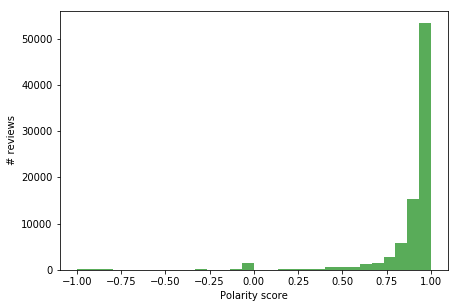

In [41]:
# Plot a distribution of positive and negative sentiment in review comments
plt.hist(reviews_sentiment_df.polarity_score, bins=30, color='g', alpha=0.65)
plt.xlabel('Polarity score')
plt.ylabel('# reviews')
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.savefig('airbnb_reviews_polarity.png')

Generally speaking, we see here a distribution highly skewed in favour of positive scores. The vast majority of review commentary seems to express strongly positive sentiment. If we bucket these scores, we can understand the numbers in each category in more detail.

In [42]:
def polarity_category_assignment(input_score):
    if input_score >= 0.75:
        output_score = "strong_positive"
    elif input_score > 0:
        output_score = "positive"
    elif input_score == 0:
        output_score = "neutral"
    elif input_score < 0:
        output_score = "negative"

    return output_score

In [44]:
reviews_sentiment_df['polarity_category'] = reviews_sentiment_df['polarity_score'].apply(polarity_category_assignment)

In [45]:
# Print numbers in each category
reviews_sentiment_df['polarity_category'].value_counts()

strong_positive    76769
positive            5594
neutral             1331
negative             849
Name: polarity_category, dtype: int64

In [46]:
# Print a sample of strong positive reviews
reviews_sentiment_df[reviews_sentiment_df.polarity_category == 'strong_positive']['comments'].sample(n = 100)

3513     We loved our stay at the Baker Cottage! It had all of the comforts of home in a quiet yet cool neighborhood.\nWe chose the Baker cottage because although we love dining out, we prefer to cook some...
7376     We had a fantastic stay. The room is cozy, but not confining. Nicely furnished, with a good-sized bathroom. Very clean. The neighborhood is quiet. Samantha met us exactly on time with a pleasant s...
9869                                                                                                 Lovely apartment with an ideal location right next to Pike Place Market.  Would definitely stay here again!
66476    The description and the photos are very accurate as to what the experience was like at Duncan's Cozy Oasis. However, the apartment was slightly darker than what it is depicted in the pictures but ...
76306    We've stayed many places in this neighborhood near where our daughter lives and this was the best!  Barbara and Bill were very welcoming and the rooms were

In [47]:
# Print a sample of positive reviews
reviews_sentiment_df[reviews_sentiment_df.polarity_category == 'positive']['comments'].sample(n = 100)

66058                                                       Reid and Aaleen were very cooperative. The apartment was very modernly furnished and equipped with everything you needed. Nice neighborhood as well!
43200    Jonathan and Tamara were friendly and made us feel welcome in their home. The room is comfortable, the bed soft, and the heated tile floor in the bathroom was a treat for the feet.  Parking along ...
76942                                                                                                       Desdemona provided great information ahead of time. The house was spotless and exactly as pictured. 
30065                                                                                                                                            Quiet, comfortable, and convenient. Our go to place in Seattle.
38182                                                                                                                                                       The host

In [48]:
# Print a sample of neutral reviews
reviews_sentiment_df[reviews_sentiment_df.polarity_category == 'neutral']['comments'].sample(n = 100)

23805                                                                                                                         The reservation was canceled 64 days before arrival. This is an automated posting.
80525                                                                       we never met Maija, but she was very concise with her directions to the home and how to get in and also how to log on the internet. 
46265                                                                                                                  The host canceled this reservation 167 days before arrival. This is an automated posting.
83448                                                                                                                         The reservation was canceled 38 days before arrival. This is an automated posting.
5050                                                                                                                          The reservation was canceled 14 days b

In [49]:
# Print a sample of neutral reviews
reviews_sentiment_df[reviews_sentiment_df.polarity_category == 'negative']['comments'].sample(n = 100)

60400    We arrived a little earlier than we told Melissa but she was flexible and the apartment had been ready. Unfortunately it was unusually hot in Seattle during our stay and there was only one fan but...
68951    Wir hatten zum Start unserer Reise zwei Übernachtungen bei John und Craig gebucht. Der Kontakt war sehr professionell und sympathisch. Der war für die Verhältnisse in Seattle gut. Bei unserer Anku...
76640    Wir haben uns bei Andrea sehr wohlgefühlt. Die Wohnung befindet sich in einem kleinen Haus. Das komplette Dachgeschoss ist sehr nett und einladend eingerichtet. In der Küche fanden wir alles was f...
44001    Jamie was great!  The chocolate and wine were a plus.  The place was spotless.  Best pillows ever.  I ended up blowing a fuse by using my hairdryer and the room heater at the same time (same thing...
27603    The location can't be beat. Walkable to the Capitol Hill scene and near a convenient number of bus stops to get you wherever you need to go in Seattle. To 

We can see from our analysis and sampling of the data that the vast majority of review text sentiment is highly positive.

Where neutral reviews exist, they often reflect automated placeholder messages. Both in neutral and negative, some foreign-language text remains. If we were to perform more in-depth text analytics into neutral and negative sentiment, we would need to translate or remove these comments to treat them appropriately. 

### 4.2. Which neighbourhoods tend to generate disproportionately positive sentiment in reviews?

Building on the above question, we'll explore here which neighbourhoods (if any) appear to generate disproportionately positive sentiment from guests. 

We'll review here the distribution of positive sentiment by locality, and observe how closely it mirrors the distribution of reviews by locality overall. We'll aim to identify which localities have the highest positive sentiment in Seattle when it comes to reviews. To do this, we're going to draw upon the 'neighbourhood_group_cleansed' definition of locality in the listings dataframe.

To begin with, we'll need to create a dataset that pulls relevant location data together with our review sentiment data.

In [55]:
# Create simple base table to join onto
listings_reduced_df = listings_df[['id', 'neighbourhood_group_cleansed']].copy()
listings_reduced_df = listings_reduced_df.rename(columns={"id": "listing_id"})

# Join the dataframes together
review_location_df = reviews_sentiment_df.merge(listings_reduced_df, on='listing_id', how='left')

In [88]:
# Create groups based on median polarity score and drop other columns
review_location_grouped_df = review_location_df.groupby(['neighbourhood_group_cleansed'], as_index=False).median()
del review_location_grouped_df['listing_id']
del review_location_grouped_df['id']
del review_location_grouped_df['reviewer_id']

In [89]:
# Sort the localities by polarity_score and then group
review_location_grouped_df.sort_values('polarity_score', inplace=True, ascending=False)
review_location_grouped_df

,neighbourhood_group_cleansed,polarity_score
7,Interbay,0.9603
12,Queen Anne,0.9588
0,Ballard,0.9585
16,West Seattle,0.9585
11,Other neighborhoods,0.9578
14,Seward Park,0.9569
9,Magnolia,0.9565
3,Cascade,0.9560
4,Central Area,0.9559
13,Rainier Valley,0.9543


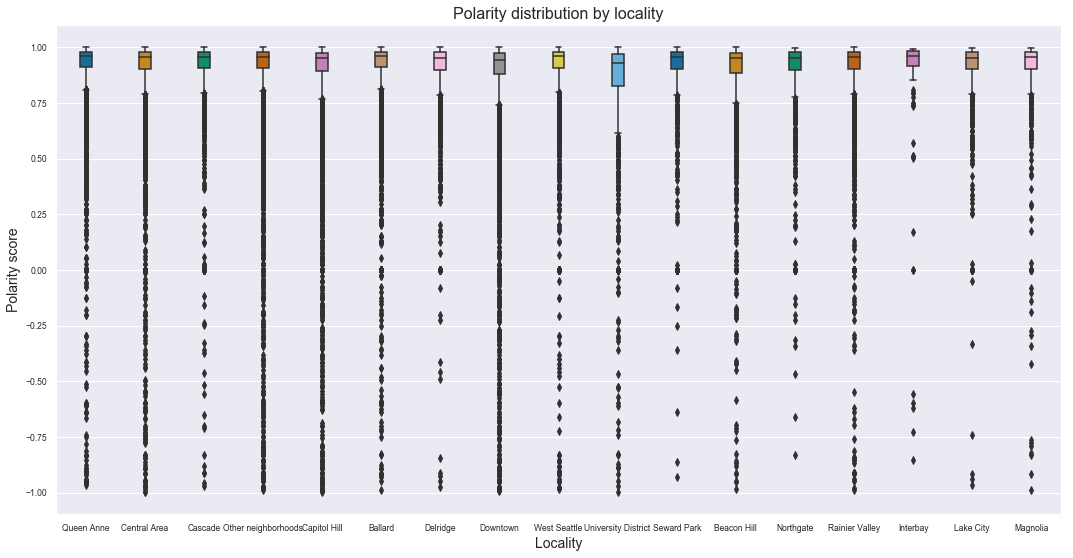

In [87]:
# Set dimension parameters
sns.set(rc={'figure.figsize':(18,9)})

# Instantiate basic plot
polarity_boxplot = sns.boxplot(y='polarity_score', x='neighbourhood_group_cleansed', 
                 data=review_location_df, 
                 width=0.2,
                 palette="colorblind")

# Amend visual parameters
polarity_boxplot.axes.set_title("Polarity distribution by locality",
                    fontsize=16)
polarity_boxplot.set_xlabel("Locality", 
                fontsize=14)
polarity_boxplot.set_ylabel("Polarity score",
                fontsize=14)
polarity_boxplot.tick_params(labelsize=8.5)

So far we can see some marginal differences in mean polarity score by locality. 

Visualizing these as a boxplot at first looks strange (with huge long tails outside the IQR), but in fact it is not surprising: the distribution of polarity is simply very, very narrow toward the positive score across the board - with a very long tail of less positive sentiment thereafter.

So far we can see most localities generate polarity scores of >0.95. However, Downtown and Interbay are notably lower than this, suggesting that perhaps they're less favourable to guests staying there. 

That said, it's hard to say how meaningful these differences are. All of the distributions overlap, suggesting the differences are not necessarily significant ones.

### 4.3. Which features are most predictive of positive review scores?

We've so far looked at quite targeted questions related to review sentiment. We're now going to broaden our analysis, and look at which features are most predictive of positive review scores overall. 

We'll first prepare our feature list, and second build a model. We'll look to extract the coefficients of this model to understand what features are more or less predictive of a positive review outcome. 

For this analysis we'll focus on the listings dataframe, and make use of the review scores it contains for properties visited.

Our target variable will be the review_scores_rating. We remove other review scores, and remove features that we won't opt to use, which includes:
- Name: Not relevant for a statistical model (unless we attempted to e.g. mine it for text features)
- Description: As above
- Experiences offered: Almost all list 'none', making it a relatively impractical variable for analysis
- Host_since: Not relevant to property itself
- Host_location: Not directly relevant (though we could in future create a feature based on e.g. whether a host resides in the same locality as the listed property)
- Host_listings_count: We'll use host_total_listings_count instead
- Host_has_profile_pic: Not relevant to property itself
- Host_identity_verified: Not relevant to property itself
- Street: We'll use the same locality feature as in 4.2 instead
- Neighbourhood_cleaned: As above
- City: Uniform for all
- State: Uniform for all
- Market: Uniform for all
- Smart_location: Uniform for all
- Country_code: Uniform for all
- Country: Uniform for all
- Latitude: We'll use the same locality feature as in 4.2 instead
- Longitude: We'll use the same locality feature as in 4.2 instead
- Is_location_exact: We'll use the same locality feature as in 4.2 instead
- Accommodates: Not really a relevant comparison point
- Bathrooms: Again, likely to be noisy as will simply vary by property size (a ratio of rooms to bathrooms may be an interesting feature for future analysis)
- Bedrooms: As above
- Beds: As above
- Bed_type: As above
- Guests_included: As above
- Extra_people: As above
- Minimum_nights: As above
- Maximum_nights: As above
- Calendar_updated: Mostly just a metadata value
- Has_availability and other availability measures: Mostly just a metadata value
- Calendar_last_scraped: As above
- First_review: Not relevant, as we'll use time since first listing instead to establish age
- Last_review: Mostly just a metadata value
- Most review scores: We'll use review_scores_rating instead
- Jurisdication_names: Uniform
- Instant_bookable: Not relevant to property itself
- Cancellation_policy: Not relevant to property itself
- Require_guest_profile_picture: Not relevant to property itself
- Require_guest_phone_verification: Not relevant to property itself
- Calculated_host_listings_count: We'll use host listings count instead
- Price frequency: Not relevant to property itself
- Verification options: Not relevant to property itself

In [147]:
# Extract the variables we want for analysis
listings_review_df = listings_df[['id', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
                                  'host_is_superhost', 'host_total_listings_count', 'property_type',
                                  'room_type', 'price', 'number_of_reviews', 'reviews_per_month',
                                  'square_feet_present', 'security_deposit_present', 'notes_present',
                                  'neighborhood_overview_present', 'transit_present', 'host_about_present',
                                  'space_present', 'summary_present', 'cleaning_fee_present',
                                  'Kitchen_Present', 'TV_Present', 'Internet_Present', 'AirCon_Present',
                                  'Parking_Present', 'Pool_Present', 'Wheelchair_Access_Present', 'Washer_Present',
                                  'Dryer_Present', 'review_scores_rating']].copy()

In [149]:
# One-hot encode three variables where it's appropriate to do so
listings_review_df = pd.get_dummies(listings_review_df, prefix=['host_response_time', 'property_type', 'room_type'],
                                   columns=['host_response_time', 'property_type', 'room_type'])

In [151]:
# Standardize encoding of binary variables to 0 & 1
listings_review_df['host_is_superhost'] = listings_review_df.host_is_superhost.map(dict(t=1, f=0))
listings_review_df = listings_review_df.applymap(lambda x: 1 if x == True else x)
listings_review_df = listings_review_df.applymap(lambda x: 0 if x == False else x)

In [197]:
# Convert dollar value on price to float
listings_review_df['price'] = listings_review_df['price'].str.replace(',', '')
listings_review_df['price'] = listings_review_df['price'].str.replace('$', '')
listings_review_df['price'] = listings_review_df['price'].astype(float)

We've now created a list of features we'd like to use, and prepared them in such a way that we can relatively easily feed them into a model to be trained and made use of. We'll now move on to model the data as if we were building a predictive model for real. In this case, however, we're primarily interested in using the model for <em>descriptive</em> purposes, i.e. to extract the features that appear strongest in training.

We'll train a simple linear regression model for this purpose, use model selection strategies to reduce the variable count, and then review the strongest coefficients. We use a lasso model to penalize complexity, given the high number of variables here.

In [199]:
# Split the data into training, validation, and testing groups
train_df, test_df = train_test_split(listings_review_df, test_size = 0.2)
validation_df, test_df = train_test_split(test_df, test_size = 0.5)

In [200]:
# Select target variable
Y_Train = train_df.iloc[:, 26]
Y_Validation = validation_df.iloc[:, 26]

# Filter training variables
X_Train = train_df.drop('id', axis=1)
X_Train = X_Train.drop('review_scores_rating', axis=1)
X_Validation = validation_df.drop('id', axis=1)
X_Validation = X_Validation.drop('review_scores_rating', axis=1)

In [222]:
# Instantiate the model and train it
clf = Lasso(alpha=0.1)
clf.fit(X_Train, Y_Train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [227]:
coefficients = pd.concat([pd.DataFrame(X_Train.columns),pd.DataFrame(np.transpose(clf.coef_))], axis = 1)
coefficients

,0,0
0,host_response_rate,0.000000
1,host_acceptance_rate,-0.000000
2,host_is_superhost,3.204466
3,host_total_listings_count,-0.017544
4,price,0.003987
5,number_of_reviews,-0.004023
6,reviews_per_month,0.169730
7,square_feet_present,0.000000
8,security_deposit_present,-0.154757
9,notes_present,0.000000


Based on this assessment, the most important features contibuting to high ratings are:
- Whether a host is a superhost
- Whether a host responds quickly
- Whether parking is present
- Whether a TV is present
- Whether aircon is present

The factor most negatively correlated with reviews is property_type_apartment, perhaps indicating that guests tend to respond more positively to bookings in houses. Slow host response times are also perceived negatively, as are security deposits. 